# Investigating the Impact of Income Inequality on Life Expectancy

## Problem Statement

The objective of this data analysis is to explore the relationship between income equality and life expectancy in different regions of the world. The dataset contains information on the 10%, 20%, and Gini % income percentiles, life expectancy, gender gap, and annual progress in 2019 for various countries in different subregions and regions. 

The analysis aims to investigate whether income equality is positively correlated with life expectancy and to identify any significant regional differences in this relationship. 

The analysis will also examine the impact of gender on this relationship by analyzing the gender gap in life expectancy and annual progress. 

## Data Loading and Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
income_equality_path = "../data/income_equality.csv"
income_equality_df = pd.read_csv(income_equality_path)

life_expectancy_path = "../data/life_expectancy.csv"
life_expectancy_df = pd.read_csv(life_expectancy_path)

In [3]:
income_equality_df.head(5)

,Country,Subregion,Region,UN R/P,CIA R/P[4],Gini[5][6],10%[4],20%[7],10%,Year,...,Year.1,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Albania,Southern Europe,Europe,7.2,4.2,7.2,2004.0,30.8,2019.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,Northern Africa,Africa,9.6,4.0,9.6,1995.0,27.6,2011.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,Middle Africa,Africa,NaN,9.0,NaN,NaN,51.3,2018.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,South America,Americas,31.6,8.8,35.0,2007.0,42.3,2020.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Armenia,Western Asia,Asia,8.0,5.0,25.8,2004.0,25.2,2020.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
life_expectancy_df.head(5)

,Countries,all,male,female,gendergap,Δ 2019all,Δ 2019male,Δ 2019female,Δ 2019gen. gap,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Japan,84.62,81.64,87.74,6.10,0.26,0.23,0.29,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Singapore,83.74,81.50,86.10,4.60,0.15,0.10,0.20,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,South Korea,83.43,80.50,86.50,6.00,0.20,0.20,0.20,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,83.21,81.60,84.90,3.30,0.25,0.30,0.20,−0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,83.20,81.20,85.30,4.10,0.30,0.30,0.30,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
life_expectancy_df = life_expectancy_df.rename(columns={"Countries":"Country"})

In [6]:
df = pd.merge(income_equality_df, life_expectancy_df, on='Country')

### Summary of Dataset

In [7]:
df.head(5)

,Country,Subregion,Region,UN R/P,CIA R/P[4],Gini[5][6],10%[4],20%[7],10%,Year,...,Δ 2019gen. gap,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12_y,Unnamed: 13_y,Unnamed: 14_y,Unnamed: 15_y,Unnamed: 16_y,Unnamed: 17_y
0,Albania,Southern Europe,Europe,7.2,4.2,7.2,2004.0,30.8,2019.0,NaN,...,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Southern Europe,Europe,7.2,4.2,7.2,2004.0,30.8,2019.0,NaN,...,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,Southern Europe,Europe,7.2,4.2,7.2,2004.0,30.8,2019.0,NaN,...,0.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,Northern Africa,Africa,9.6,4.0,9.6,1995.0,27.6,2011.0,NaN,...,0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,Northern Africa,Africa,9.6,4.0,9.6,1995.0,27.6,2011.0,NaN,...,0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail(5)

,Country,Subregion,Region,UN R/P,CIA R/P[4],Gini[5][6],10%[4],20%[7],10%,Year,...,Δ 2019gen. gap,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12_y,Unnamed: 13_y,Unnamed: 14_y,Unnamed: 15_y,Unnamed: 16_y,Unnamed: 17_y
463,Zimbabwe,Eastern Africa,Africa,NaN,8.6,NaN,NaN,50.3,2019.0,NaN,...,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,Zimbabwe,Eastern Africa,Africa,NaN,8.6,NaN,NaN,50.3,2019.0,NaN,...,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,World,NaN,NaN,NaN,NaN,38.0,2007.0,NaN,NaN,NaN,...,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,World,NaN,NaN,NaN,NaN,38.0,2007.0,NaN,NaN,NaN,...,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,World,NaN,NaN,NaN,NaN,38.0,2007.0,NaN,NaN,NaN,...,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         468 non-null    object 
 1   Subregion       465 non-null    object 
 2   Region          465 non-null    object 
 3   UN R/P          366 non-null    float64
 4   CIA R/P[4]      417 non-null    float64
 5   Gini[5][6]      366 non-null    float64
 6   10%[4]          366 non-null    float64
 7   20%[7]          465 non-null    float64
 8   10%             465 non-null    float64
 9   Year            0 non-null      float64
 10  %               0 non-null      float64
 11  Year.1          0 non-null      float64
 12  Unnamed: 12_x   0 non-null      float64
 13  Unnamed: 13_x   0 non-null      float64
 14  Unnamed: 14_x   0 non-null      float64
 15  Unnamed: 15_x   0 non-null      float64
 16  Unnamed: 16_x   0 non-null      float64
 17  Unnamed: 17_x   0 non-null      flo

In [10]:
df.describe()

,UN R/P,CIA R/P[4],Gini[5][6],10%[4],20%[7],10%,Year,%,Year.1,Unnamed: 12_x,...,Unnamed: 20,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12_y,Unnamed: 13_y,Unnamed: 14_y,Unnamed: 15_y,Unnamed: 16_y,Unnamed: 17_y
count,366.000000,417.000000,366.000000,366.000000,465.000000,465.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,18.227049,7.944604,20.736885,2001.598361,37.715484,2016.083871,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.523093,4.260166,22.962511,3.654968,7.766990,4.711900,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.500000,3.500000,4.500000,1989.000000,23.200000,1992.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.200000,5.200000,8.600000,2000.000000,32.400000,2015.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,12.250000,6.600000,12.250000,2002.000000,36.200000,2018.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19.200000,9.000000,20.600000,2003.000000,42.300000,2019.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,106.600000,28.400000,157.300000,2013.000000,63.000000,2021.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
lst = list(df.columns)
lst

['Country',
 'Subregion',
 'Region',
 'UN R/P',
 'CIA R/P[4]',
 'Gini[5][6]',
 '10%[4]',
 '20%[7]',
 '10%',
 'Year',
 '%',
 'Year.1',
 'Unnamed: 12_x',
 'Unnamed: 13_x',
 'Unnamed: 14_x',
 'Unnamed: 15_x',
 'Unnamed: 16_x',
 'Unnamed: 17_x',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'all',
 'male',
 'female',
 'gendergap',
 'Δ 2019all',
 'Δ 2019male',
 'Δ 2019female',
 'Δ 2019gen. gap',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12_y',
 'Unnamed: 13_y',
 'Unnamed: 14_y',
 'Unnamed: 15_y',
 'Unnamed: 16_y',
 'Unnamed: 17_y']

In [12]:
df = df.drop(columns=["Unnamed: 9"])
df = df.drop(columns=["Unnamed: 10"])
df = df.drop(columns=["Unnamed: 11"])
df = df.drop(columns=["Unnamed: 12_y"])
df = df.drop(columns=["Unnamed: 13_y"])
df = df.drop(columns=["Unnamed: 14_y"])
df = df.drop(columns=["Unnamed: 15_y"])
df = df.drop(columns=["Unnamed: 16_y"])
df = df.drop(columns=["Unnamed: 17_y"])
df = df.drop(columns=["Unnamed: 12_x"])
df = df.drop(columns=["Unnamed: 13_x"])
df = df.drop(columns=["Unnamed: 14_x"])
df = df.drop(columns=["Unnamed: 15_x"])
df = df.drop(columns=["Unnamed: 16_x"])
df = df.drop(columns=["Unnamed: 17_x"])
df = df.drop(columns=["Unnamed: 18"])
df = df.drop(columns=["Unnamed: 19"])
df = df.drop(columns=["Unnamed: 20"])
df = df.drop(columns=["Year"])
df = df.drop(columns=["Year.1"])
df = df.drop(columns=["%"])
df = df.drop(columns=["Gini[5][6]"])
df = df.drop(columns=["10%[4]"])

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df = df.rename(columns={"10%":"Gini Year"})
df = df.rename(columns={"UN R/P":"R/P 10%"})
df = df.rename(columns={"CIA R/P[4]":"R/P 20%"})
df = df.rename(columns={"20%[7]":"Gini %"})
df = df.rename(columns={"all":"Life Expectancy (all)"})
df = df.rename(columns={"male":"Life Expectancy (M)"})
df = df.rename(columns={"female":"Life Expectancy (F)"})
df = df.rename(columns={"gendergap":"Gender Gap"})
df = df.rename(columns={"Δ 2019all":" Annual Progress 2019 (all)"})
df = df.rename(columns={"Δ 2019male":" Annual Progress 2019 (M)"})
df = df.rename(columns={"Δ 2019female":" Annual Progress 2019 (F)"})
df = df.rename(columns={"Δ 2019gen. gap":" Gender Gap Progress 2019"})

In [15]:
years = df['Gini Year'].value_counts()
print(years)

Gini Year
2019.0    36
2018.0    31
2020.0    19
2017.0    12
2014.0    10
2016.0     9
2015.0     9
2013.0     5
2011.0     5
2012.0     4
2008.0     3
2007.0     2
2010.0     2
2003.0     2
2021.0     1
1997.0     1
2009.0     1
1999.0     1
1992.0     1
1998.0     1
Name: count, dtype: int64


In [16]:
print("Missing values distrubution: ")
print(df.isnull().mean())

Missing values distrubution: 
Country                        0.000000
Subregion                      0.006410
Region                         0.006410
R/P 10%                        0.217949
R/P 20%                        0.108974
Gini %                         0.006410
Gini Year                      0.006410
Life Expectancy (all)          0.000000
Life Expectancy (M)            0.000000
Life Expectancy (F)            0.000000
Gender Gap                     0.000000
 Annual Progress 2019 (all)    0.000000
 Annual Progress 2019 (M)      0.000000
 Annual Progress 2019 (F)      0.000000
 Gender Gap Progress 2019      0.000000
dtype: float64


In [17]:
df.shape

(156, 15)

## Exploratory Data Analysis

Next, we perform exploratory data analysis (EDA) on the dataset. We create visualizations to understand the distribution of the data and identify any patterns or correlations.

We want to collect the data from the year 2019 since the data of life expectancy was collected from 2019. 

In [18]:
df = df[df['Gini Year'] == 2019]
df.head(10)

,Country,Subregion,Region,R/P 10%,R/P 20%,Gini %,Gini Year,Life Expectancy (all),Life Expectancy (M),Life Expectancy (F),Gender Gap,Annual Progress 2019 (all),Annual Progress 2019 (M),Annual Progress 2019 (F),Gender Gap Progress 2019
0,Albania,Southern Europe,Europe,7.2,4.2,30.8,2019.0,76.99,74.63,79.68,5.04,−2.29,−2.54,−1.99,0.55
18,Austria,Western Europe,Europe,6.9,4.9,30.2,2019.0,81.19,78.90,83.60,4.70,−0.70,−0.80,−0.60,0.20
30,Belgium,Western Europe,Europe,8.2,4.2,27.2,2019.0,80.80,78.60,83.10,4.50,−1.20,−1.20,−1.20,0.00
54,Bulgaria,Eastern Europe,Europe,7.0,7.3,40.3,2019.0,73.61,69.90,77.50,7.60,−1.50,−1.70,−1.30,0.40
81,China,Eastern Asia,Asia,21.6,10.2,38.2,2019.0,78.08,75.31,81.06,5.75,0.11,0.01,0.24,0.23
96,Croatia,Southern Europe,Europe,7.3,5.3,28.9,2019.0,77.72,74.70,80.90,6.20,−0.70,−0.70,−0.70,0.00
99,Cyprus,Western Asia,Asia,NaN,5.3,31.2,2019.0,81.39,79.34,83.45,4.10,−0.01,−0.16,0.18,0.34
102,Denmark,Northern Europe,Europe,8.1,4.0,27.7,2019.0,81.55,79.60,83.60,4.00,0.10,0.10,0.10,0.00
117,El Salvador,Central America,Americas,38.6,7.0,38.8,2019.0,71.06,66.43,75.41,8.98,−1.50,−1.58,−1.36,0.21
120,Estonia,Northern Europe,Europe,10.8,5.4,30.8,2019.0,78.35,74.20,82.70,8.50,−0.30,−0.30,−0.30,0.00


In [19]:
df["R/P 10%"] = df["R/P 10%"].fillna(-1)

In [20]:
df = df.drop(columns=["Gini Year"])

We want to analyze the data distrubution we are working on therefore pie charts for the distrubution of region and subregion was created. 

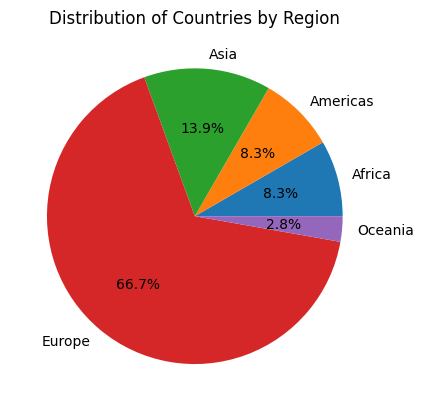

In [21]:
region_counts = df.groupby('Region').size()

plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Countries by Region')
plt.show()

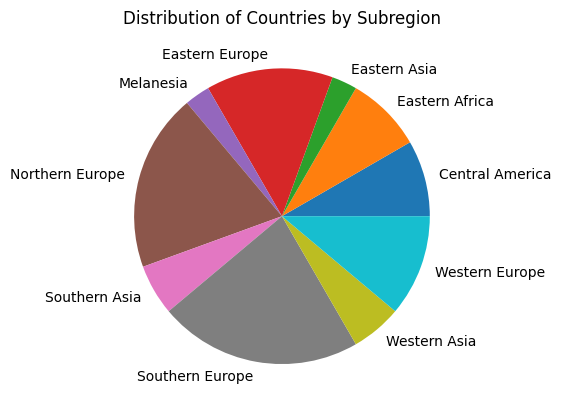

In [22]:
subregion_counts = df.groupby('Subregion').size()

plt.pie(subregion_counts, labels=subregion_counts.index)
plt.title('Distribution of Countries by Subregion')
plt.show()

#### Examining the ratio of the average income of the richest 10% to the poorest 10%

R/P 10% refers to the ratio of the average income of the richest 10% of a population to the average income of the poorest 10% of the same population.

This is a measure of income inequality within a population, specifically comparing the income of the richest and poorest segments of the population. A high R/P 10% ratio indicates a larger gap between the rich and poor in terms of income, while a low R/P 10% ratio indicates a smaller gap.

In [23]:
rp_10_filtered= df[df['R/P 10%'] != 0]
rp_10 = rp_10_filtered.sort_values(by=['R/P 10%'], ascending=False)
rp_10.head(5)

,Country,Subregion,Region,R/P 10%,R/P 20%,Gini %,Life Expectancy (all),Life Expectancy (M),Life Expectancy (F),Gender Gap,Annual Progress 2019 (all),Annual Progress 2019 (M),Annual Progress 2019 (F),Gender Gap Progress 2019
171,Honduras,Central America,Americas,59.4,17.1,48.2,71.46,69.13,73.99,4.86,−1.42,−1.41,−1.38,0.02
321,Panama,Central America,Americas,49.9,15.9,49.8,76.66,73.47,80.03,6.56,−1.15,−1.32,−0.92,0.40
117,El Salvador,Central America,Americas,38.6,7.0,38.8,71.06,66.43,75.41,8.98,−1.50,−1.58,−1.36,0.21
81,China,Eastern Asia,Asia,21.6,10.2,38.2,78.08,75.31,81.06,5.75,0.11,0.01,0.24,0.23
186,Iran,Southern Asia,Asia,17.2,7.7,40.9,74.83,72.10,77.82,5.71,−1.27,−1.28,−1.24,0.04


#### Examining the ratio of the average income of the richest 20% to the poorest 20%

R/P 20% refers to the ratio of the average income of the richest 20% of a population to the average income of the poorest 20% of the same population.

This is a measure of income inequality within a population, specifically comparing the income of the richest and poorest segments of the population. A high R/P 20% ratio indicates a larger gap between the rich and poor in terms of income, while a low R/P 20% ratio indicates a smaller gap.

In [24]:
rp_20 = df.sort_values(by=['R/P 20%'], ascending=False)
rp_20.head(5)

,Country,Subregion,Region,R/P 10%,R/P 20%,Gini %,Life Expectancy (all),Life Expectancy (M),Life Expectancy (F),Gender Gap,Annual Progress 2019 (all),Annual Progress 2019 (M),Annual Progress 2019 (F),Gender Gap Progress 2019
171,Honduras,Central America,Americas,59.4,17.1,48.2,71.46,69.13,73.99,4.86,−1.42,−1.41,−1.38,0.02
321,Panama,Central America,Americas,49.9,15.9,49.8,76.66,73.47,80.03,6.56,−1.15,−1.32,−0.92,0.40
81,China,Eastern Asia,Asia,21.6,10.2,38.2,78.08,75.31,81.06,5.75,0.11,0.01,0.24,0.23
462,Zimbabwe,Eastern Africa,Africa,-1.0,8.6,50.3,61.12,58.13,63.86,5.73,−0.17,−0.52,0.20,0.72
426,Turkey,Western Asia,Asia,6.6,8.5,41.9,75.85,72.77,79.06,6.29,−1.98,−1.91,−1.89,0.02


#### Examing the gender gap of life expectancy between males and females

In [25]:
data = df.sort_values('Gender Gap', ascending = False)
data.head()

,Country,Subregion,Region,R/P 10%,R/P 20%,Gini %,Life Expectancy (all),Life Expectancy (M),Life Expectancy (F),Gender Gap,Annual Progress 2019 (all),Annual Progress 2019 (M),Annual Progress 2019 (F),Gender Gap Progress 2019
237,Lithuania,Northern Europe,Europe,10.4,7.2,35.3,74.93,70.10,80.00,9.90,−1.35,−1.50,−1.20,0.30
225,Latvia,Northern Europe,Europe,11.6,5.8,34.5,75.39,70.90,80.10,9.20,0.00,0.00,0.00,0.00
276,Moldova,Eastern Europe,Europe,8.2,3.6,26.0,70.17,65.69,74.85,9.16,−0.77,−0.69,−0.77,−0.08
117,El Salvador,Central America,Americas,38.6,7.0,38.8,71.06,66.43,75.41,8.98,−1.50,−1.58,−1.36,0.21
120,Estonia,Northern Europe,Europe,10.8,5.4,30.8,78.35,74.20,82.70,8.50,−0.30,−0.30,−0.30,0.00


#### Examing the difference in life expectancy of all countries

In [26]:
data = df.sort_values('Life Expectancy (all)', ascending = False)
data.head()

,Country,Subregion,Region,R/P 10%,R/P 20%,Gini %,Life Expectancy (all),Life Expectancy (M),Life Expectancy (F),Gender Gap,Annual Progress 2019 (all),Annual Progress 2019 (M),Annual Progress 2019 (F),Gender Gap Progress 2019
315,Norway,Northern Europe,Europe,6.1,4.1,27.7,83.21,81.60,84.90,3.30,0.25,0.30,0.20,−0.10
261,Malta,Southern Europe,Europe,-1.0,4.5,31.0,82.65,80.80,84.60,3.80,−0.20,−0.40,0.00,0.40
399,Sweden,Northern Europe,Europe,6.2,4.6,29.3,82.41,80.70,84.20,3.50,−0.70,−0.80,−0.60,0.20
387,Spain,Southern Europe,Europe,10.3,7.3,34.3,82.33,79.70,85.10,5.40,−1.50,−1.40,−1.60,−0.20
132,Finland,Northern Europe,Europe,5.6,3.9,27.7,82.13,79.40,85.00,5.60,0.15,0.10,0.20,0.10


#### Examing the difference in Gini coefficient of all countries

In [27]:
data = df.sort_values('Gini %', ascending = False)
data.head()

,Country,Subregion,Region,R/P 10%,R/P 20%,Gini %,Life Expectancy (all),Life Expectancy (M),Life Expectancy (F),Gender Gap,Annual Progress 2019 (all),Annual Progress 2019 (M),Annual Progress 2019 (F),Gender Gap Progress 2019
462,Zimbabwe,Eastern Africa,Africa,-1.0,8.6,50.3,61.12,58.13,63.86,5.73,−0.17,−0.52,0.20,0.72
321,Panama,Central America,Americas,49.9,15.9,49.8,76.66,73.47,80.03,6.56,−1.15,−1.32,−0.92,0.40
171,Honduras,Central America,Americas,59.4,17.1,48.2,71.46,69.13,73.99,4.86,−1.42,−1.41,−1.38,0.02
432,Uganda,Eastern Africa,Africa,16.6,8.2,42.7,62.85,60.72,64.90,4.18,−0.14,−0.18,−0.09,0.09
426,Turkey,Western Asia,Asia,6.6,8.5,41.9,75.85,72.77,79.06,6.29,−1.98,−1.91,−1.89,0.02


#### Describing the relationship between the ratio of the average income of the richest 10% to the poorest 10% and the gini coefficient

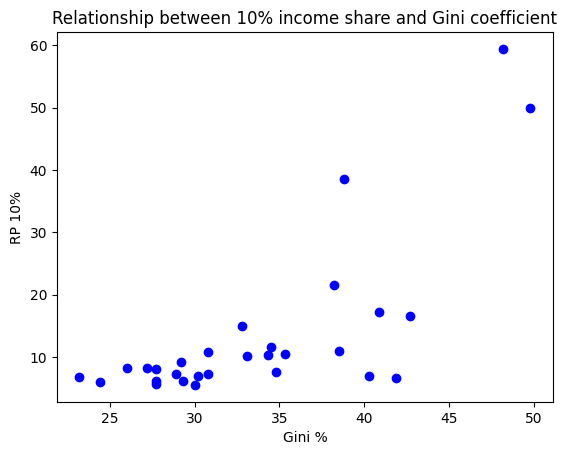

In [28]:
data = df.sort_values('Gini %')
rp_10 = data[data['R/P 10%'] != -1]

plt.scatter(x=rp_10['Gini %'], y=rp_10['R/P 10%'], color='blue')
plt.xlabel('Gini %')
plt.ylabel('RP 10%')
plt.title('Relationship between 10% income share and Gini coefficient')
plt.show()

#### Describing the relationship between the ratio of the average income of the richest 20% to the poorest 20% and the gini coefficient

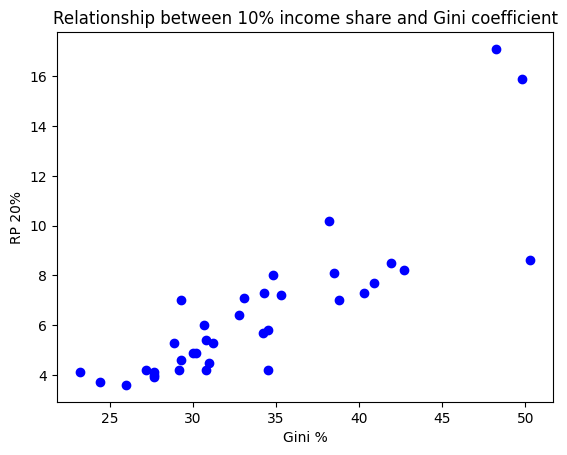

In [29]:
data = df.sort_values('Gini %')
plt.scatter(x=data['Gini %'], y=data['R/P 20%'], color='blue')

plt.xlabel('Gini %')
plt.ylabel('RP 20%')
plt.title('Relationship between 10% income share and Gini coefficient')
plt.show()

As seen for both 10% and 20% scatter plots, the gini coefficient % increases as the average income ratio increases for almost all countries. 

#### Examining the relationship between gini coefficient and life expectancy of both genders for each country

It is observed that there is an increase in life expectancy as the Gini coefficient (%) increase. This means there is a positive correlation between the two features. Therefore we can conclude that countries with higher levels of income inequality (as measured by the Gini coefficient) tend to have higher life expectancies.

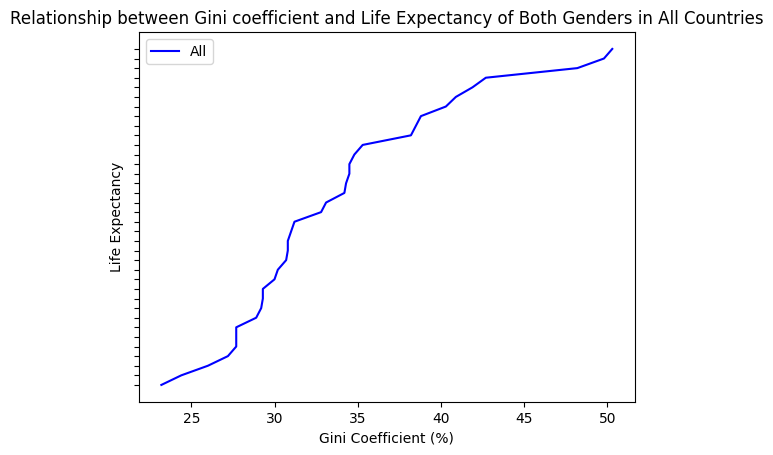

In [30]:
data = df.sort_values('Gini %')
plt.plot(data['Gini %'], data['Life Expectancy (all)'], color='blue')

plt.xlabel('Gini Coefficient (%)')
plt.ylabel('Life Expectancy')
plt.title('Relationship between Gini coefficient and Life Expectancy of Both Genders in All Countries')
plt.gca().set_yticklabels([])
plt.legend(['All'])
plt.show()